# Predicting Total Interactions of Facebook page
## Phase 2: Statistical Modelling

#### Group Number: 
45
#### Names & Student IDs of Group Members:
Athul Varghese Thampan, S3958556

Mohamed Bilal Naeem, S3967700


## Table of Contents
* [Introduction](#intro)
  + [Phase 1 Summary](#Phase-1-Summary)
  + [Report Overview](#Report-Overview)
  + [Overview of Methodology](#Overview-of-Methodology)
* [Statistical Modelling](#sm)
  + [Full Model Overview](#Full-Model-Overview)
  + [Model Fitting](#Model-Fitting)
* [Critique & Limitations](#cl)
* [Summary & Conclusions](#sc)
  + [Project Summary](#Project-Summary)
  + [Summary of Findings](#Summary-of-Findings)
  + [Conclusions](#Conclusions)
* [References](#References)

## Introduction <a id='intro'></a>

### Phase 1 Summary

This report continues on the Phase 1 report. For the Phase 1 report, we cleaned and preprocessed the Facebook metrics dataset. During this process, we decided to remove data that we decided was unnecessary for statistical analysis and modelling. The data that was dropped was the `category` column since it was redundant, and we also dropped any missing values in the dataset. The dataset contained 500 observations in total out of which 5 were dropped due to missing values. After the data preprocessing, the dataset contains 18 variables and 495 observations. We also changed the `paid` column to have values that were `strings` since it is a binary categorical variable, and for the ease of handling the data. We also represented the data using a variety of graphs so as to visualise the data. 

We will be using the same Facebook metrics dataset for the Phase 2 report in order to conduct statistical modelling. But the dataset that we are using will be the cleaned and preprocessed dataset, which was the result of Phase 1 report and it was saved as a separate preprocessed dataset.


### Report Overview

Our Phase 2 report contains multiple sections. Firstly, we have a detailed summary of the Phase 1 report which we have gone through. Next, we have an overview of the methodology that we follow for our Phase 2 report. Following this, we conduct our statistical modelling for the full model as well as the reduced model using different statistical and plotting modules in Python.

After this, we move onto providing a comprehensive summary of our whole project including both Phase 1 and Phase 2. We also provide a summary of our findings and detailed conclusions that we arrived at regarding the project. 

### Overview of Methodology

We use the concept of multiple linear regression to conduct our statistical modelling. We use the help of a variety of Python libraries such as numpy, pandas, matplotlib, seaborn, etc., to work with our dataset.

To begin with, we import all the necessary modules for conducting statistical modelling and read in the Facebook metrics dataset. We first provide an overview of the full model and then move onto model fitting. We then construct a statistical model formula and then we fit an OLS model to the encoded data. We then define a new data frame for actual total interactions vs. predicted total interactions and the residuals for the full model which we use to plot predicted values and regression residuals. We then conduct the full model diagnostic checks to check whether there are indications of violations of the regression assumptions. We conduct this with the help of graphs and plots.

After this, we conduct backwards feature selection and we provide a reduced model overview. Finally, we conduct reduced model diagnostic checks similar to the full model.

## Statistical Modelling <a id='sm'></a>

### Full Model Overview

Firstly, we will read the preprocessed Facebook metrics dataset and import the required modules.

#### Module Imports

In [1]:
#importing all the required modules and reading the csv file.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('Phase2_Group45.csv')

Now let's view the first 10 rows of this dataset.

In [2]:
#printing first 10 rows
df.head(10)

,page_total_likes,type,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
0,139441,Photo,12,4,3,No,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,12,3,10,No,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,12,3,3,No,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,12,2,10,Yes,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,12,2,3,No,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,12,1,9,No,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,12,1,3,Yes,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,12,7,9,Yes,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,12,7,3,No,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,12,6,10,No,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


Since the dataset was already preprocessed during Phase 1, we will not be preprocessing it again.

#### Variables

There are 18 variables in this dataset, and they are as follows:
- page_total_likes
- type
- post_month
- post_weekday
- post_hour
- paid
- lifetime_post_total_reach
- lifetime_post_total_impressions
- lifetime_engaged_users
- lifetime_post_consumers
- lifetime_post_consumptions
- lifetime_post_impressions_by_people_who_have_liked_your_page
- lifetime_post_reach_by_people_who_like_your_page
- lifetime_people_who_have_liked_your_page_and_engaged_with_your_post
- comment
- like
- share
- total_interactions

Our target variable is `total_interactions` and the remaining variables are our independent variables.

### Model Fitting

### Regression Formula

We now construct the regression formula and add all the independent variables using some string functions.

(We will be dropping the `like` and `share` variables for this model since it seems to cause the R-squared and Adj. R-squared values to be equal to 1. We disregard these variables, so that we can more meaningful plots for our model.)

In [3]:
#regression formula as a string
formula_string_indep_vars = ' + '.join(df.drop(['total_interactions','like','share'],axis=1).columns)
formula_string = 'total_interactions ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  total_interactions ~ page_total_likes + type + post_month + post_weekday + post_hour + paid + lifetime_post_total_reach + lifetime_post_total_impressions + lifetime_engaged_users + lifetime_post_consumers + lifetime_post_consumptions + lifetime_post_impressions_by_people_who_have_liked_your_page + lifetime_post_reach_by_people_who_like_your_page + lifetime_people_who_have_liked_your_page_and_engaged_with_your_post + comment


Next, we can one-hot-encode the categorical features in the dataset using `get_dummies()` function in `Pandas`. Here, the categorical features are: `type` and `paid`. Let's print the first 10 rows after one-hot-encoding.

In [4]:
#one-hot-encoding the categorical features and printing first 10 rows
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head(10)

,page_total_likes,post_month,post_weekday,post_hour,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions,type_Photo,type_Status,type_Video,paid_Yes
0,139441,12,4,3,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100,1,0,0,0
1,139441,12,3,10,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164,0,1,0,0
2,139441,12,3,3,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80,1,0,0,0
3,139441,12,2,10,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777,1,0,0,1
4,139441,12,2,3,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393,1,0,0,0
5,139441,12,1,9,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186,0,1,0,0
6,139441,12,1,3,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279,1,0,0,1
7,139441,12,7,9,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339,1,0,0,1
8,139441,12,7,3,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192,0,1,0,0
9,139441,12,6,10,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142,1,0,0,0


We can now create a new formula string using the one-hot-encoded features.

In [5]:
#new formula string
formula_string_indep_vars_encoded = ' + '.join(df_encoded.drop(['total_interactions','like','share'],axis=1).columns)
formula_string_encoded = 'total_interactions ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  total_interactions ~ page_total_likes + post_month + post_weekday + post_hour + lifetime_post_total_reach + lifetime_post_total_impressions + lifetime_engaged_users + lifetime_post_consumers + lifetime_post_consumptions + lifetime_post_impressions_by_people_who_have_liked_your_page + lifetime_post_reach_by_people_who_like_your_page + lifetime_people_who_have_liked_your_page_and_engaged_with_your_post + comment + type_Photo + type_Status + type_Video + paid_Yes


Now, we add two interaction terms to our full model. Let it be the interaction of the `comment` feature with `lifetime_post_total_reach` and
`lifetime_post_total_impressions` respectively.

In [6]:
formula_string_encoded = formula_string_encoded + ' + lifetime_post_total_reach:comment + lifetime_post_total_impressions:comment'

Next, we can add the square of the `comment` feature to illustrate higher order terms in our linear regression.

In [7]:
formula_string_encoded = formula_string_encoded + ' + np.power(comment, 2)'
print('formula_string_encoded: ', formula_string_encoded)

formula_string_encoded:  total_interactions ~ page_total_likes + post_month + post_weekday + post_hour + lifetime_post_total_reach + lifetime_post_total_impressions + lifetime_engaged_users + lifetime_post_consumers + lifetime_post_consumptions + lifetime_post_impressions_by_people_who_have_liked_your_page + lifetime_post_reach_by_people_who_like_your_page + lifetime_people_who_have_liked_your_page_and_engaged_with_your_post + comment + type_Photo + type_Status + type_Video + paid_Yes + lifetime_post_total_reach:comment + lifetime_post_total_impressions:comment + np.power(comment, 2)


Now, let us view the OLS regression results.

In [8]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=df_encoded)
model_full_fitted = model_full.fit()

print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     total_interactions   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1517.
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:24:21   Log-Likelihood:                -2611.2
No. Observations:                 495   AIC:                             5264.
Df Residuals:                     474   BIC:                             5353.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

The full model has an adjusted R-squared value of 0.984, which means that about 98% of the variance is explained by the model. Looking at our p-values, we observe that the majority of them are highly significant.

Now, we define a new data frame for actual total interactions vs. predicted total interactions and the
residuals for the full model. We will use this to plot predicted values and the regression residuals.

In [9]:
residuals_full = pd.DataFrame({'actual': df_encoded['total_interactions'], 
                               'predicted': model_full_fitted.fittedvalues, 
                               'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,100,100.603715,-0.603715
1,164,161.098378,2.901622
2,80,81.008855,-1.008855
3,1777,1903.183699,-126.183699
4,393,395.059153,-2.059153
5,186,165.295341,20.704659
6,279,269.879831,9.120169
7,339,360.786790,-21.786790
8,192,192.857715,-0.857715
9,142,125.293506,16.706494


We now plot actual total interactions vs. predicted total interactions.

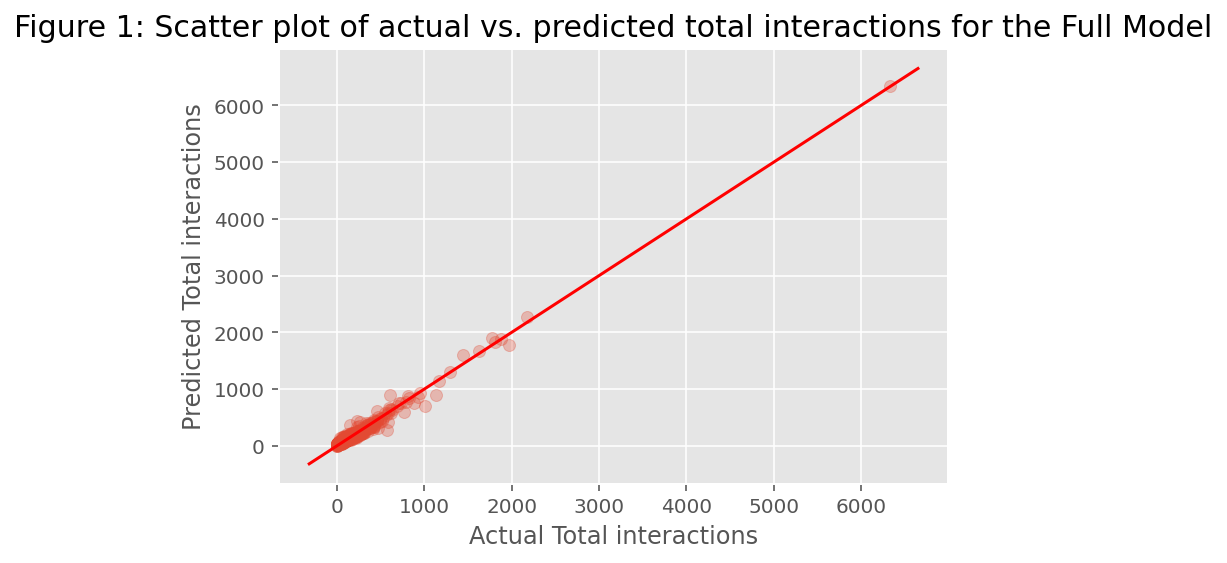

In [10]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

# Creating scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Total interactions');
plt.ylabel('Predicted Total interactions');
plt.title('Figure 1: Scatter plot of actual vs. predicted total interactions for the Full Model', fontsize=15);
plt.show();

From Figure 1, we can see that most of the residuals are very close to the line of best fit. There is only 1 prediction that is higher than 3000, the rest are below 3000.

We can now proceed to full model diagnostic checks.

### Full Model Diagnostic Checks

We now check whether there are indications of violations of the regression assumptions, which are

1. Linearity: The relationship between the explanatory and the response variable should be linear.
2. Nearly normal residuals: Histogram of the residuals should be bell-shaped centred at zero.
3. Constant variability: The variability of points around the least squares line should be roughly constant.
4. Independence of observations: each row in the underlying dataset should be independent of each other.

Let's first get a scatter plot of the residuals.

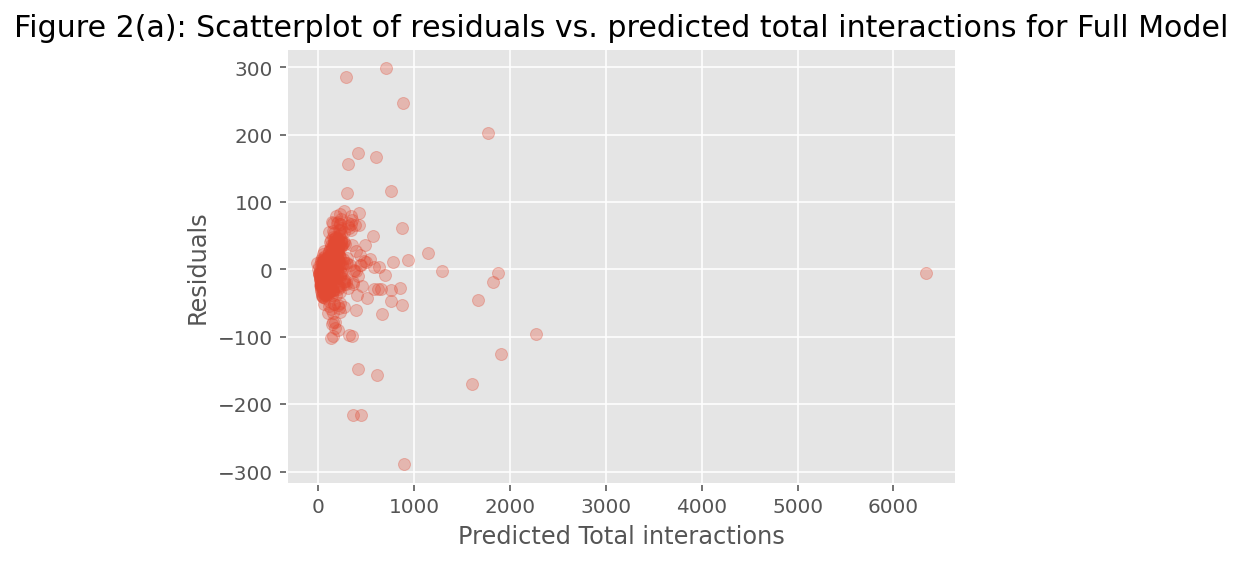

In [11]:
#scatterplot of residuals vs. predicted total interactions
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Total interactions');
plt.ylabel('Residuals')
plt.title('Figure 2(a): Scatterplot of residuals vs. predicted total interactions for Full Model', fontsize=15)
plt.show();

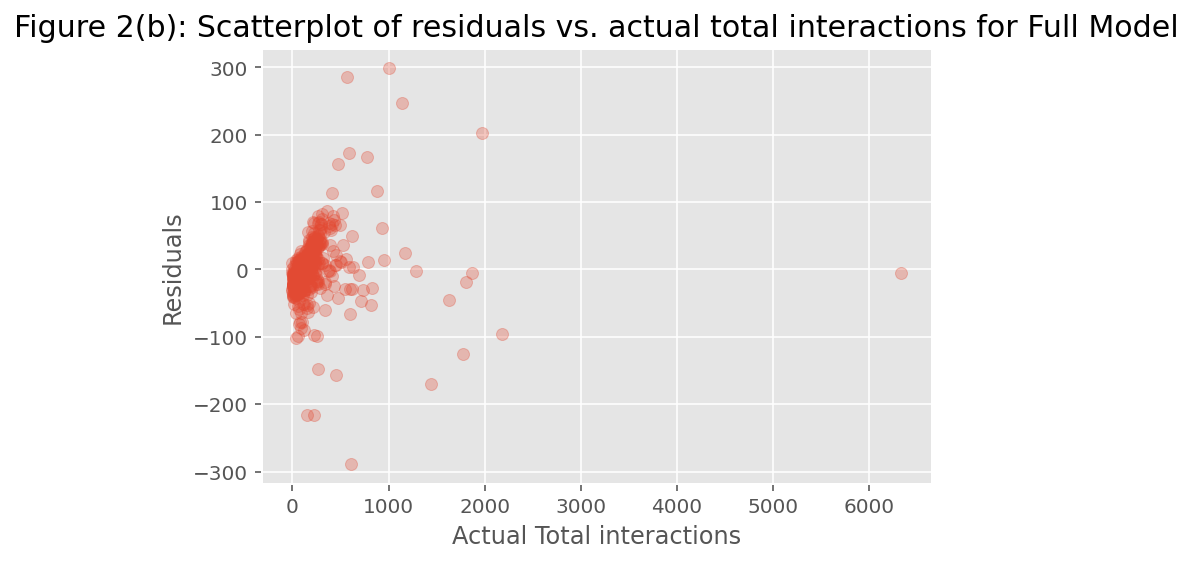

In [12]:
#scatterplot of residuals vs. actual total interactions
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Total interactions');
plt.ylabel('Residuals')
plt.title('Figure 2(b): Scatterplot of residuals vs. actual total interactions for Full Model', fontsize=15)
plt.show();

From Figure 2(a) and Figure 2(b), we can see that they are both more or less very similar. We can also see that the residuals are mostly random and centred around 0. This pattern indicates that the constant variability assumption of linear regression is mostly satisfied in this case.

Now, let's check the histograms of actual vs. predicted total interactions on the same plot.

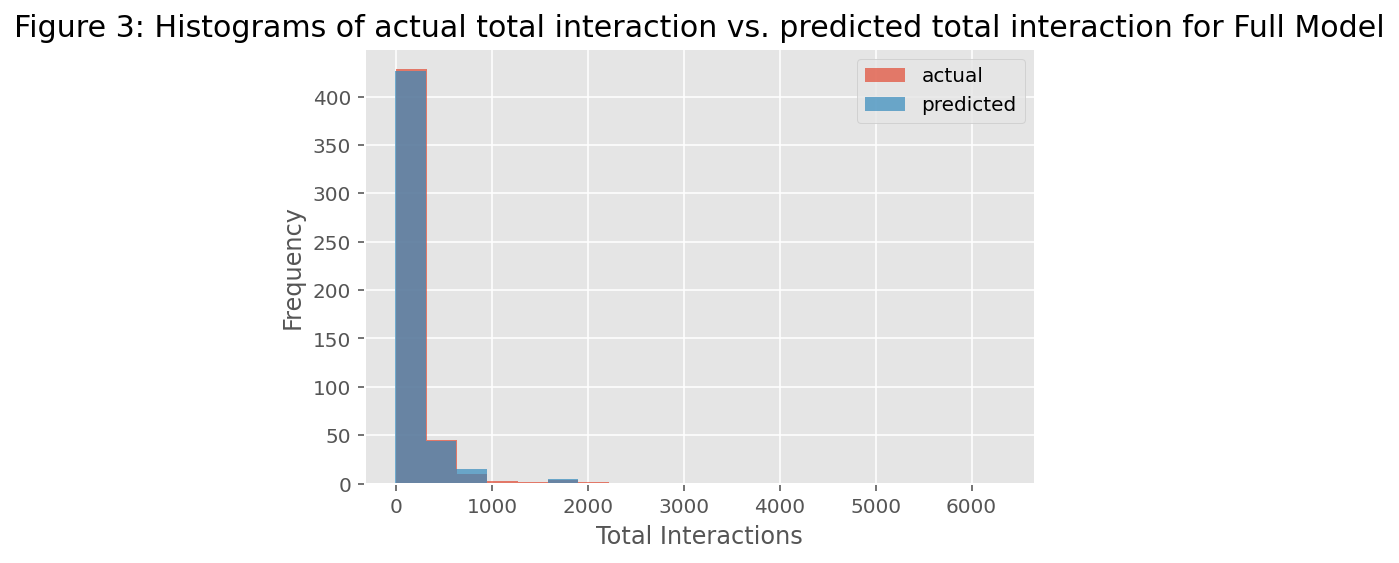

In [13]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Total Interactions');
plt.ylabel('Frequency');
plt.title('Figure 3: Histograms of actual total interaction vs. predicted total interaction for Full Model', fontsize=15);
plt.legend()
plt.show();

We can notice that their distributions are extremely similar. It seems to be right-skewed and unimodal.

Next, we can look at the histogram of the residuals.

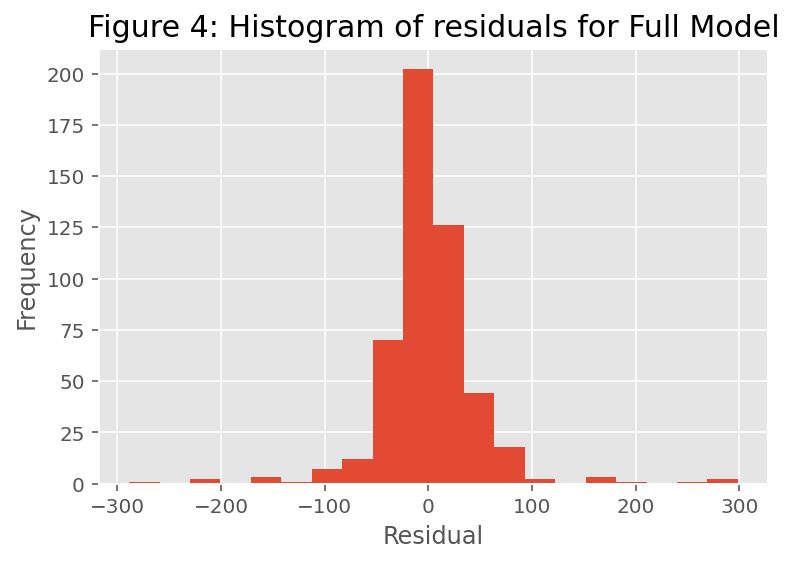

In [14]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From Figure 4, we can see that the distribution is mostly symmetric and unimodal. Hence, it seems that the normality assumption is not notably violated.

### Backwards Feature Selection

We now perform backwards feature selection using p-value cutoff as 0.05 ([credit](https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb)).

In [16]:
## create the patsy model description from formula
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

# initialize feature-selected fit to full model
linreg_fit = model_full_fitted

# do backwards elimination using p-values
p_val_cutoff = 0.05

## WARNING 1: The code below assumes that the Intercept term is present in the model.
## WARNING 2: It will work only with main effects and two-way interactions, if any.

print('\nPerforming backwards feature selection using p-values:')

while True:

    # uncomment the line below if you would like to see the regression summary
    # in each step:
    ### print(linreg_fit.summary())

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): ## this is a main effect term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: ## this is an interaction term
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=df_encoded).fit()
    
###
## this is the clean fit after backwards elimination
model_reduced_fitted = smf.ols(formula = patsy_description, data = df_encoded).fit()
###
    
#########
print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "type_Photo" with p-value 0.7652

Removing term "lifetime_post_reach_by_people_who_like_your_page" with p-value 0.6084

Removing term "post_weekday" with p-value 0.5842

Removing term "paid_Yes" with p-value 0.4809

Removing term "lifetime_post_consumptions" with p-value 0.4148

Removing term "lifetime_post_total_impressions:comment" with p-value 0.4141

Removing term "lifetime_post_total_reach:comment" with p-value 0.386

Removing term "np.power(comment, 2)" with p-value 0.4008

Removing term "page_total_likes" with p-value 0.3826

Removing term "type_Status" with p-value 0.1457

***
                            OLS Regression Results                            
Dep. Variable:     total_interactions   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     3055.
Date:                

### Reduced Model Overview

The independent variables we are using for the reduced model are:
- post_month
- post_hour
- lifetime_post_total_reach
- lifetime_post_total_impressions
- lifetime_engaged_users
- lifetime_post_consumers
- lifetime_post_impressions_by_people_who_have_liked_your_page
- lifetime_people_who_have_liked_your_page_and_engaged_with_your_post
- comment
- type_Video

Similar to what we did for the full model, we define a new data frame for actual total interactions vs. predicted total interactions and the residuals for the reduced model.

In [18]:
residuals_reduced = pd.DataFrame({'actual': df_encoded['total_interactions'], 
                                  'predicted': model_reduced_fitted.fittedvalues, 
                                  'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,100,101.993166,-1.993166
1,164,173.147959,-9.147959
2,80,81.464673,-1.464673
3,1777,1923.605228,-146.605228
4,393,399.304446,-6.304446
5,186,177.777598,8.222402
6,279,275.329404,3.670596
7,339,361.727133,-22.727133
8,192,199.117176,-7.117176
9,142,125.313119,16.686881


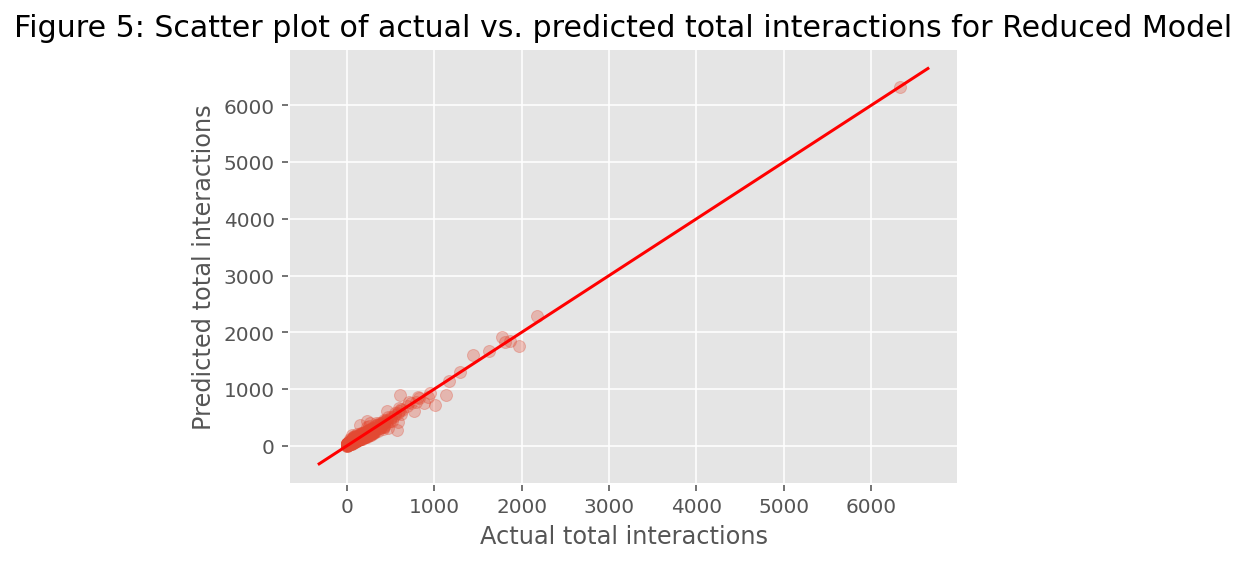

In [19]:
# scatterplot of actual vs. predicted total interactions
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual total interactions');
plt.ylabel('Predicted total interactions');
plt.title('Figure 5: Scatter plot of actual vs. predicted total interactions for Reduced Model', fontsize=15);
plt.show(); 

This model also has Adj. R-squared value of 0.984, but it has dropped 10 variables. Looking at the p-values, we can see that they all are below 0.05 now.

### Reduced Model Diagnostic Checks

We now plot a scatterplot of residuals.

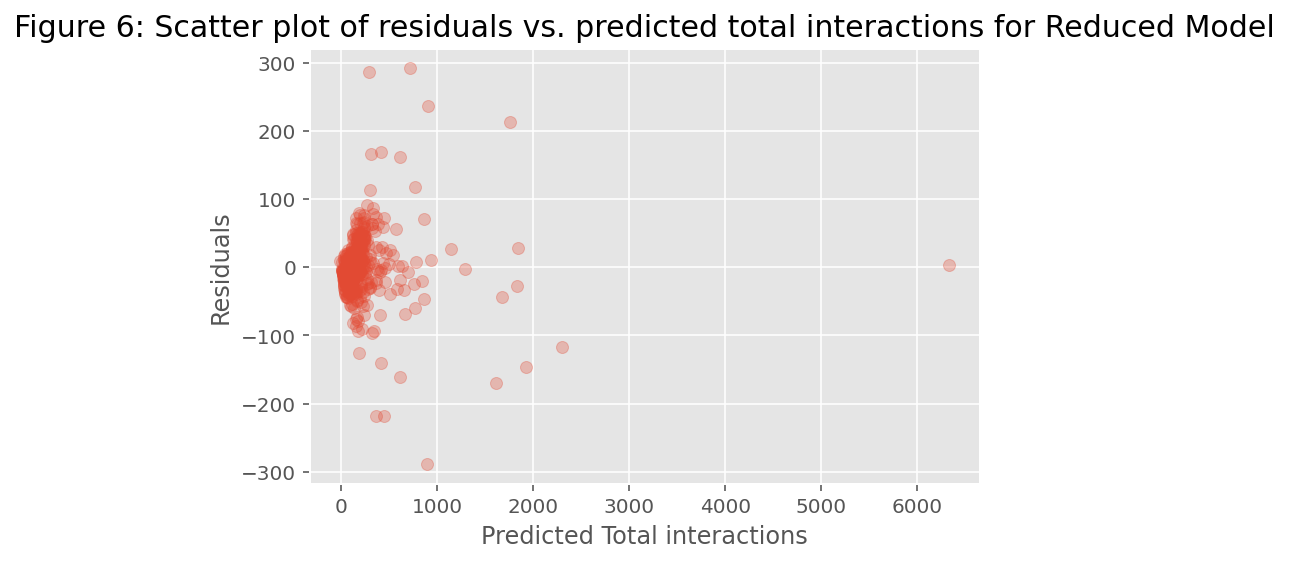

In [20]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Total interactions');
plt.ylabel('Residuals')
plt.title('Figure 6: Scatter plot of residuals vs. predicted total interactions for Reduced Model', fontsize=15)
plt.show();

We can see that Figure 6 is very similar to Figure 2(a) and 2(b) which means that the residuals have the same pattern in both the models.

Next, let's plot the histogram of residuals for reduced model.

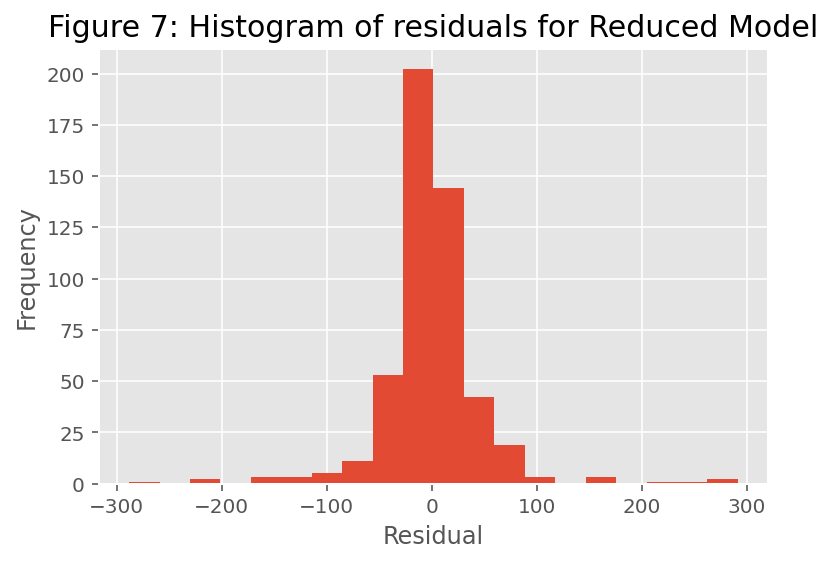

In [21]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 7: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

Again, we can see that Figure 7 shows a similar pattern to Figure 4, with its peak next to 0 which suggests that residuals are more or less normally distributed.

## Critique & Limitations <a id='cl'></a>

*need more ideas - need to find strengths and weaknesses*

We had to remove two independent variables, namely, `like` and `share` so as to not have R-squared and Adj. R-squared values equal to 1. We did this so that we could have a more meaningful statistical modelling, although this may not have been the right approach. We also had to one-hot-encode our dataset which caused the number of categorical features to increase. We can see in our graphs that there are some outliers present which could have caused the validity of our regression model to suffer. Majority of the p-values of the independent variables were significantly high which caused us to drop many of the explanatory features for our reduced model.    

Overall, we believe we did well in conducting our statistical modelling with the Facebook metrics dataset.

## Summary & Conclusions <a id='sc'></a>

### Project Summary

*first draft of task 3 & 4, will be updating tomorrow by 6 ( if you have more ideas for what to write about in limitations and critiques send them to me ill write about them*

Phase 1 of the project had us perform data preprocessing as well as cleaning. During this phase we removed the 'category' coloumn after which missing values were removed in the dataset.After having identified the primary response varialbe as 'total lifetime interactions', We then presented this data using visual data representations such as with the use of scatterpoints, barplots and histograms. After completing the visual data reperesentaion of the dataset in phase 1, we concluded phase 1 of the project. 

In our conclusion we analysed and identified different relationships in the dataset that can prove useful. A data visualisation analysis on the dataset in phase 1 helped identify multiple factors that can help increase the response variable. The total lifetime interactions from the dataset improved users liked and commented more, in addition to this it was also identified that photo content was the most interacted with content. We identified that these factors can help increase engagement.

For phase 2 of the project, we began by ... . We found that having completed our preprocessing and cleaning on our relatively small dataset of less than 500 observations allowed us to perform the phase 2 modelling in an efficient ans simple manner. In phase 2 we highlighted ...



### Summary of Findings

We have identified different findings that can prove useful. In phase 1 we found that engagement increases with photo posts as well as when users like and comment on posts. In phase 2 we were able to perform linear regression on the dataset...

### Conclusions

The goals and objectives of our {project?} was to use the facebook metrics dataset to have an understanding of the data using the knowledge, tools and skills we have gathered in the course. We were able to analyse the facebook metrics dataset...

## References

- Akmand. (2022, October 6). Stats_tutorials/regression_case_study_predicting_age_in_census_data.ipynb at main ·     akmand/stats_tutorials. GitHub. Retrieved October 22, 2022, from        https://github.com/akmand/stats_tutorials/blob/main/regression_case_study_predicting_age_in_census_data.ipynb 
- Diez, D. M., Barr, C. D., &amp; Çetinkaya-Rundel Mine. (2016). OpenIntro statistics. 